<a href="https://colab.research.google.com/github/iam-fern/Generate_groupwise_4X/blob/main/GQtest_groupwise_(y_hat)_0_1_0_9_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_groupwise_4X/groupwise_0.1_0.9'

In [4]:
os.listdir(base_path)

['data_groupwise_0.1_0.9_n250.csv',
 'data_groupwise_0.1_0.9_n120.csv',
 'data_groupwise_0.1_0.9_n60.csv',
 'data_groupwise_0.1_0.9_n30.csv',
 'data_groupwise_0.1_0.9_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_groupwise_0.1_0.9_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.937644,30.232326,79.510348,40.553069,-0.213342,237.020045,237.518103,-0.498058
1,0.0,1.0,91.690701,20.297324,51.858764,20.109581,0.371427,194.327796,194.165627,0.162169
2,0.0,2.0,55.707945,34.649364,65.949482,91.222073,0.135538,257.664402,257.598926,0.065476
3,0.0,3.0,71.776162,71.411310,53.300878,76.123576,0.447470,283.059396,282.635699,0.423697
4,0.0,4.0,79.162389,88.147955,35.363342,35.991221,-0.196310,248.468597,248.711530,-0.242933
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.535937,71.481489,21.847629,48.962437,1.601820,181.429313,179.888166,1.541146
119996,999.0,116.0,86.939316,65.252421,31.398525,25.031297,-0.318947,218.302613,218.678781,-0.376168
119997,999.0,117.0,67.303117,22.281905,94.342577,50.605540,-0.490557,244.042583,244.564206,-0.521623
119998,999.0,118.0,30.675675,23.998655,90.938444,22.228917,0.054066,177.895758,177.848911,0.046847


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.937644,30.232326,79.510348,40.553069,-0.213342,237.020045,237.518103,-0.498058
1,0.0,1.0,91.690701,20.297324,51.858764,20.109581,0.371427,194.327796,194.165627,0.162169
2,0.0,2.0,55.707945,34.649364,65.949482,91.222073,0.135538,257.664402,257.598926,0.065476
3,0.0,3.0,71.776162,71.411310,53.300878,76.123576,0.447470,283.059396,282.635699,0.423697
4,0.0,4.0,79.162389,88.147955,35.363342,35.991221,-0.196310,248.468597,248.711530,-0.242933
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.535937,71.481489,21.847629,48.962437,1.601820,181.429313,179.888166,1.541146
119996,999.0,116.0,86.939316,65.252421,31.398525,25.031297,-0.318947,218.302613,218.678781,-0.376168
119997,999.0,117.0,67.303117,22.281905,94.342577,50.605540,-0.490557,244.042583,244.564206,-0.521623
119998,999.0,118.0,30.675675,23.998655,90.938444,22.228917,0.054066,177.895758,177.848911,0.046847


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.937644  30.232326  79.510348  40.553069 -0.213342  237.020045   
      1.0    91.690701  20.297324  51.858764  20.109581  0.371427  194.327796   
      2.0    55.707945  34.649364  65.949482  91.222073  0.135538  257.664402   
      3.0    71.776162  71.411310  53.300878  76.123576  0.447470  283.059396   
      4.0    79.162389  88.147955  35.363342  35.991221 -0.196310  248.468597   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  27.535937  71.481489  21.847629  48.962437  1.601820  181.429313   
      116.0  86.939316  65.252421  31.398525  25.031297 -0.318947  218.302613   
      117.0  67.303117  22.281905  94.342577  50.605540 -0.490557  244.042583   
      118.0  30.675675  23.998655  90.938444  22.228917  0.054066  177.895758   
      119.0  37.511192  74.629695  82.769580  81.344982 -0.672055  285.583394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.518103 -0.498058  
      1.0    194.165627  0.162169  
      2.0    257.598926  0.065476  
      3.0    282.635699  0.423697  
      4.0    248.711530 -0.242933  
...                 ...       ...  
999.0 115.0  179.888166  1.541146  
      116.0  218.678781 -0.376168  
      117.0  244.564206 -0.521623  
      118.0  177.848911  0.046847  
      119.0  286.186342 -0.602948  

[120000 rows x 8 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.937644  30.232326  79.510348  40.553069 -0.213342  237.020045   
      1.0    91.690701  20.297324  51.858764  20.109581  0.371427  194.327796   
      2.0    55.707945  34.649364  65.949482  91.222073  0.135538  257.664402   
      3.0    71.776162  71.411310  53.300878  76.123576  0.447470  283.059396   
      4.0    79.162389  88.147955  35.363342  35.991221 -0.196310  248.468597   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  27.535937  71.481489  21.847629  48.962437  1.601820  181.429313   
      116.0  86.939316  65.252421  31.398525  25.031297 -0.318947  218.302613   
      117.0  67.303117  22.281905  94.342577  50.605540 -0.490557  244.042583   
      118.0  30.675675  23.998655  90.938444  22.228917  0.054066  177.895758   
      119.0  37.511192  74.629695  82.769580  81.344982 -0.672055  285.583394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.518103 -0.498058  
      1.0    194.165627  0.162169  
      2.0    257.598926  0.065476  
      3.0    282.635699  0.423697  
      4.0    248.711530 -0.242933  
...                 ...       ...  
999.0 115.0  179.888166  1.541146  
      116.0  218.678781 -0.376168  
      117.0  244.564206 -0.521623  
      118.0  177.848911  0.046847  
      119.0  286.186342 -0.602948  

[120000 rows x 8 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,x4,e,Y,y_hat,e_hat
0,0.0,0.0,76.937644,30.232326,79.510348,40.553069,-0.213342,237.020045,237.518103,-0.498058
1,0.0,1.0,91.690701,20.297324,51.858764,20.109581,0.371427,194.327796,194.165627,0.162169
2,0.0,2.0,55.707945,34.649364,65.949482,91.222073,0.135538,257.664402,257.598926,0.065476
3,0.0,3.0,71.776162,71.411310,53.300878,76.123576,0.447470,283.059396,282.635699,0.423697
4,0.0,4.0,79.162389,88.147955,35.363342,35.991221,-0.196310,248.468597,248.711530,-0.242933
...,...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,27.535937,71.481489,21.847629,48.962437,1.601820,181.429313,179.888166,1.541146
119996,999.0,116.0,86.939316,65.252421,31.398525,25.031297,-0.318947,218.302613,218.678781,-0.376168
119997,999.0,117.0,67.303117,22.281905,94.342577,50.605540,-0.490557,244.042583,244.564206,-0.521623
119998,999.0,118.0,30.675675,23.998655,90.938444,22.228917,0.054066,177.895758,177.848911,0.046847


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3         x4         e           Y  \
rep   index                                                                     
0.0   0.0    76.937644  30.232326  79.510348  40.553069 -0.213342  237.020045   
      1.0    91.690701  20.297324  51.858764  20.109581  0.371427  194.327796   
      2.0    55.707945  34.649364  65.949482  91.222073  0.135538  257.664402   
      3.0    71.776162  71.411310  53.300878  76.123576  0.447470  283.059396   
      4.0    79.162389  88.147955  35.363342  35.991221 -0.196310  248.468597   
...                ...        ...        ...        ...       ...         ...   
999.0 115.0  27.535937  71.481489  21.847629  48.962437  1.601820  181.429313   
      116.0  86.939316  65.252421  31.398525  25.031297 -0.318947  218.302613   
      117.0  67.303117  22.281905  94.342577  50.605540 -0.490557  244.042583   
      118.0  30.675675  23.998655  90.938444  22.228917  0.054066  177.895758   
      119.0  37.511192  74.629695  82.769580  81.344982 -0.672055  285.583394   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    237.518103 -0.498058  
      1.0    194.165627  0.162169  
      2.0    257.598926  0.065476  
      3.0    282.635699  0.423697  
      4.0    248.711530 -0.242933  
...                 ...       ...  
999.0 115.0  179.888166  1.541146  
      116.0  218.678781 -0.376168  
      117.0  244.564206 -0.521623  
      118.0  177.848911  0.046847  
      119.0  286.186342 -0.602948  

[120000 rows x 8 columns]

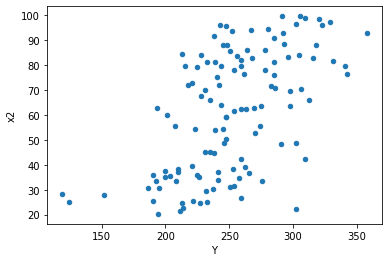

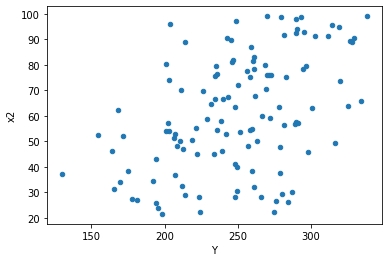

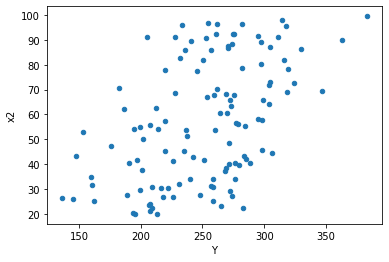

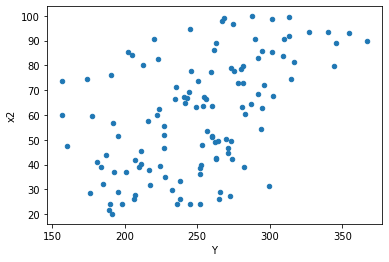

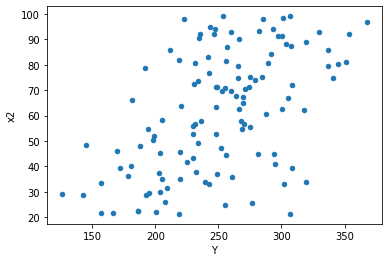

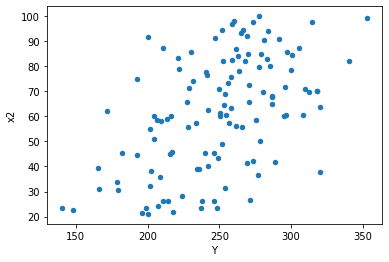

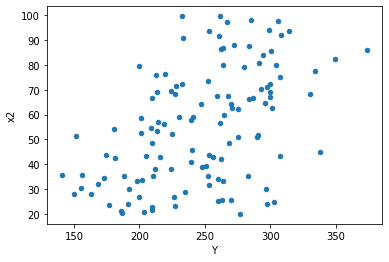

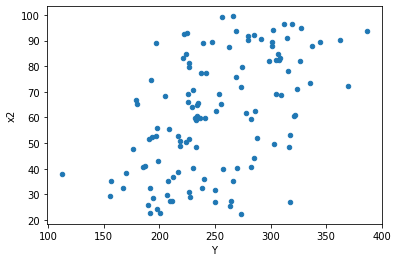

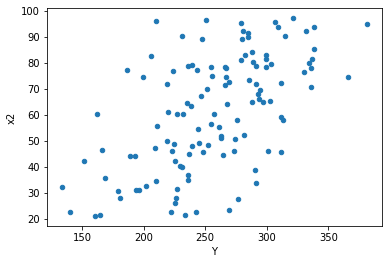

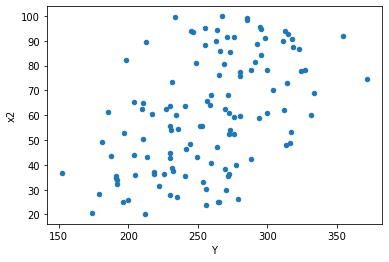

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='Y', y='x2', kind = 'scatter')
tablenew1.plot(x ='Y', y='x2', kind = 'scatter')
tablenew2.plot(x ='Y', y='x2', kind = 'scatter')
tablenew3.plot(x ='Y', y='x2', kind = 'scatter')
tablenew4.plot(x ='Y', y='x2', kind = 'scatter')
tablenew5.plot(x ='Y', y='x2', kind = 'scatter')
tablenew6.plot(x ='Y', y='x2', kind = 'scatter')
tablenew7.plot(x ='Y', y='x2', kind = 'scatter')
tablenew8.plot(x ='Y', y='x2', kind = 'scatter')
tablenew9.plot(x ='Y', y='x2', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3', 'x4']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3', 'x4']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,44.0,44.0,15.329215764013624,19.548026018313976,0.348391267363946,0.4442733185980449,1.2752137042916636,0.42326428576694797,0.788367857116526,0.21163214288347398,Reject001=1 : Homoscedasticity
1.0,44.0,44.0,12.5010229527383,21.312950627663767,0.2841141580167795,0.48438524153781287,1.7048965279273605,0.08025651670945266,0.9598717416452737,0.04012825835472633,Reject001=1 : Homoscedasticity
3.0,44.0,44.0,16.564045820015423,24.54453256902024,0.37645558681853236,0.557830285659551,1.4817957421586865,0.1960904188400696,0.9019547905799652,0.0980452094200348,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,17.233025891353694,29.24811962849258,0.3916596793489476,0.6647299915566496,1.6972132353823717,0.08281903153609438,0.9585904842319528,0.04140951576804719,Reject001=1 : Homoscedasticity
7.0,44.0,44.0,24.891353631565543,25.83233838737182,0.5657125825355805,0.5870985997129959,1.0378036795320358,0.9026075179894546,0.5486962410052727,0.4513037589947273,Reject001=1 : Homoscedasticity
8.0,44.0,44.0,25.055517968169625,31.893169983446626,0.5694435901856733,0.7248447723510597,1.2729000463675713,0.42672762716846946,0.7866361864157653,0.21336381358423473,Reject001=1 : Homoscedasticity
10.0,44.0,44.0,24.766331711736655,26.433254044688976,0.5628711752667421,0.6007557737429313,1.06730598428359,0.829927507701929,0.5850362461490355,0.4149637538509645,Reject001=1 : Homoscedasticity
13.0,44.0,44.0,22.844770840298146,33.552249830770435,0.5191993372795033,0.7625511325175099,1.4687059049672897,0.20630903517340582,0.8968454824132971,0.10315451758670291,Reject001=1 : Homoscedasticity
18.0,44.0,44.0,17.624144837694743,20.070083286568455,0.40054874631124415,0.45613825651291945,1.1387833833300274,0.6683319095895301,0.6658340452052349,0.3341659547947651,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,44.0,44.0,15.329215764013624,19.548026018313976,0.348391267363946,0.4442733185980449,1.2752137042916636,0.42326428576694797,Reject001=1 : Homoscedasticity
1.0,44.0,44.0,12.5010229527383,21.312950627663767,0.2841141580167795,0.48438524153781287,1.7048965279273605,0.08025651670945266,Reject001=1 : Homoscedasticity
2.0,44.0,44.0,15.472311621394482,8.648460564663079,0.35164344594078367,0.19655592192416088,0.5589637008541335,0.056772198808932514,Reject001=1 : Homoscedasticity
3.0,44.0,44.0,16.564045820015423,24.54453256902024,0.37645558681853236,0.557830285659551,1.4817957421586865,0.1960904188400696,Reject001=1 : Homoscedasticity
4.0,44.0,44.0,28.201008079547886,20.96635271530203,0.6409320018079065,0.4765080162568643,0.7434611080625653,0.3291458866713528,Reject001=1 : Homoscedasticity
5.0,44.0,44.0,19.60725081012223,19.45697002287376,0.4456193365936871,0.44220386415622187,0.99233544831431,0.9797568387327492,Reject001=1 : Homoscedasticity
6.0,44.0,44.0,17.233025891353694,29.24811962849258,0.3916596793489476,0.6647299915566496,1.6972132353823717,0.08281903153609438,Reject001=1 : Homoscedasticity
7.0,44.0,44.0,24.891353631565543,25.83233838737182,0.5657125825355805,0.5870985997129959,1.0378036795320358,0.9026075179894546,Reject001=1 : Homoscedasticity
8.0,44.0,44.0,25.055517968169625,31.893169983446626,0.5694435901856733,0.7248447723510597,1.2729000463675713,0.42672762716846946,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      940
Reject001=0 : Heteroscedasticity     60
Name: Result_test, dtype: int64